In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as ipy
from ipywidgets import Output
import numpy as np

df = pd.read_parquet('/Users/lucianoleroi/Desktop/piscine/Jour7/flights.parquet')
output3= Output()
with output3:
  
  display(df)

display(output3)

Output()

<Axes: xlabel='AIR_TIME', ylabel='Count'>

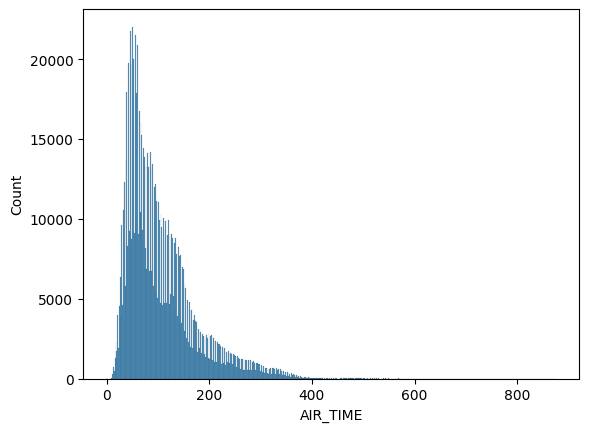

In [5]:

sns.histplot(data = df, x = "AIR_TIME")

variance avant modification : 4807.52807180797
variace post transformation logaritmique : 0.3829708993434906


<Axes: xlabel='AIR_TIME', ylabel='Count'>

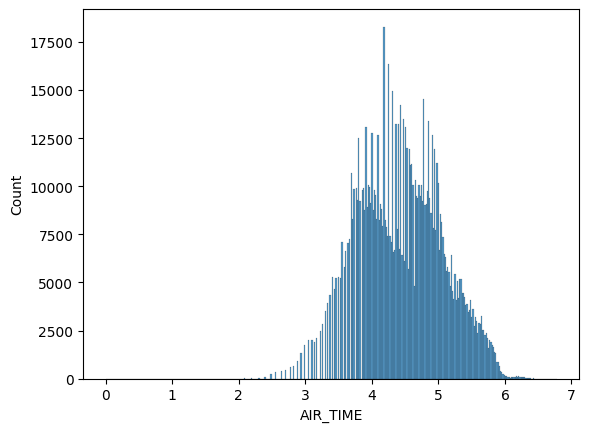

In [7]:
import numpy as np

variance=df['AIR_TIME'].var()
print (f"variance avant modification : {variance}")

df_filtered = df[df["AIR_TIME"]>0].copy()

df_filtered["AIR_TIME"] = np.log(df_filtered["AIR_TIME"])

variance2=df_filtered['AIR_TIME'].var()
print (f"variace post transformation logaritmique : {variance2}")

sns.histplot(data = df_filtered, x = "AIR_TIME")

NameError: name 'plt' is not defined

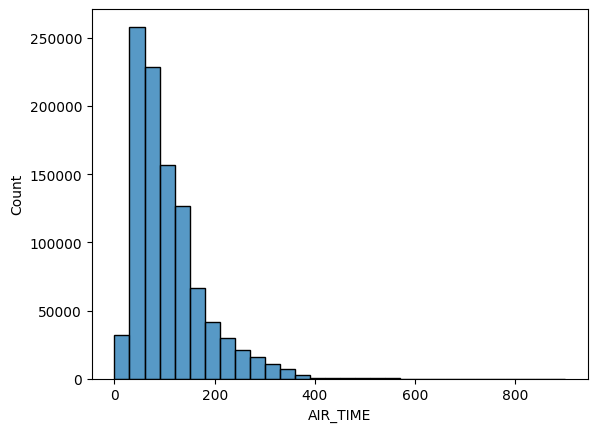

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_parquet('/Users/lucianoleroi/Desktop/piscine/Jour7/flights.parquet')

#ne me demande pas pourquoi mais a chaque fois il me demande de reimporter pandas et numpy et mon data frame

df['AIR_TIME_GROUP'] = pd.cut(
    df['AIR_TIME'],
    bins=np.arange(0, df['AIR_TIME'].max() + 30, 30),
    right=False
)


sns.histplot(
    data=df,
    x='AIR_TIME',
    bins=np.arange(0, df['AIR_TIME'].max() + 30, 30),
    kde=False  
)


plt.xticks(ticks=np.arange(0, df['AIR_TIME'].max() + 30, 30), rotation=45)
plt.title("Répartition du Temps de Vol par Échelons de 30 Minutes", fontsize=12)
plt.xlabel("Temps de vol exprimé en minutes")
plt.ylabel("Nombre de Vols", fontsize=12)
plt.tight_layout()
plt.show()

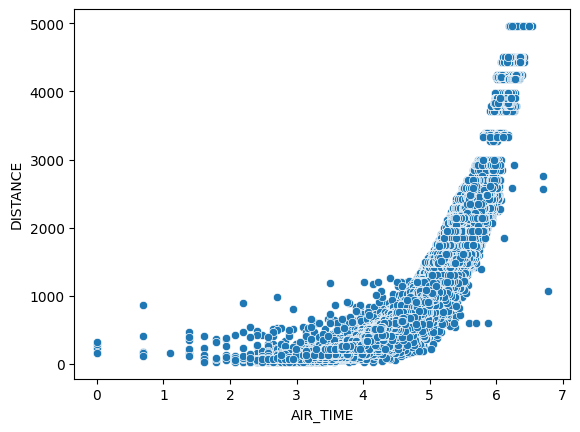

In [34]:
sns.scatterplot(data = df, x = "AIR_TIME" , y = "DISTANCE")

plt.title=("Relation DISTANCE/AIR_TIME")



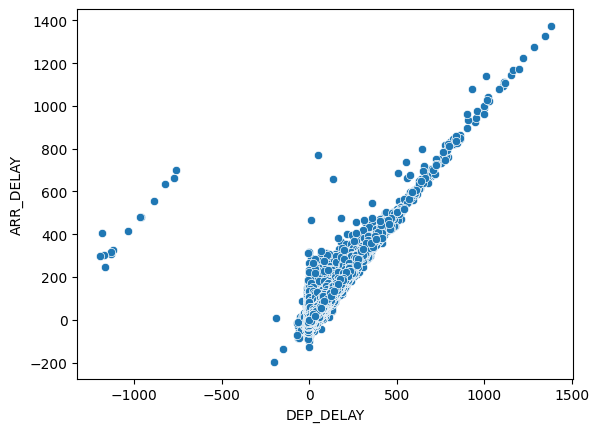

In [33]:

sns.scatterplot(data = df, x = "DEP_DELAY", y ="ARR_DELAY")

plt.title=("Relation DEP_DELAY/ARR_DELAY")

Notre premier graphique montre une augmentation à tendance exponentielle qui illustre une relation directe entre la distance du vol et le temps parcouru, ce qui est logique étant donné que les deux données sont corrélées et leur relation reste proportionnelle. On constate que plus la distance à parcourir est longue, plus le temps parcouru sera important.


Dans le deuxième graphique, on constate deux groupes de points : le premier se trouve du côté négatif de l’axe des abscisses, qui représente le retard dans le départ du vol, et porte une valeur positive correspondant au retard de l’avion lors de son arrivée, leur relation est linaire et augmente proportionnellement. De ce premier groupe de points, on peut inférer deux hypothèses possibles. La première, c'est que, soit les données sont erronées et portent des valeurs négatives par une erreur dans la base de données, soit que lorsque le départ du vol est en avance, les pilotes prennent du retard dans leur arrivée. Dans le cadre de la deuxième hypothèse, on peut inférer que ceci peut être lié à des facteurs extérieurs à leur heure de départ, soit que dans leur intention d’arriver à l’heure prévue, ils n’arrivent pas à gérer une bonne vitesse et arrivent en retard car ils vont trop lentement. Soit qu’ils peuvent partir en avance par des conditions météorologiques qui obligent aux pilotes à prendre des précautions plus importantes, expliquant désormais leur retard lors de son arrivée. Nonobstant, on ne peut pas le savoir sans un examen minutieux de ces facteurs, ces conclusions sont purement hypothétiques.

Par ailleurs, le deuxième groupe montre aussi que les données sont proportionnelles entre elles, on constate que l'évolution est linéaire, à contrario du premier, laquelle est exponentielle. Par conséquent, on admet une relation directe entre les deux données si présentes. Il demeure logique que plus un avion parte en retard, plus il arrivera en retard. 

